# Text Classification and Word Embeddings (PyTorch)

## 2. Text Classification Defined
- **Text classification** assigns labels to text, giving meaning to words and sentences.
- Helps organize and structure **unstructured data**.
- Applications:
  - Customer sentiment analysis in reviews
  - Spam email detection
  - Tagging news articles with topics
- Types of classification:
  - **Binary**
  - **Multi-class**
  - **Multi-label**

---

## 3. Binary Classification
- Sorts text into **two categories**.
- Example: **Spam vs Not Spam** in email detection.

---

## 4. Multi-class Classification
- Categorizes text into **more than two categories**.
- Example: News article -> Politics, Sports, Technology, etc.
- Each text belongs to **exactly one category**.

---

## 5. Multi-label Classification
- Text can belong to **multiple categories simultaneously**.
- Example: A book -> Action + Adventure + Fantasy.

---

## 6. Word Embeddings
- Previous encoding techniques: **One-hot, Bag-of-Words, TF-IDF**
  - Good for preprocessing
  - But result in too many features
  - Cannot capture semantic similarity
- **Word embeddings**:
  - Represent words as **numerical vectors**
  - Preserve **semantic meaning** and relationships
  - Example: "king" ↔ "queen", "man" ↔ "woman"
- Real-world embeddings often have **high dimensionality** (not just 3D).

---

## 7. Word-to-Index Mapping
- Each word is assigned a **unique index**.
- Example:
  - "King" -> 1
  - "Queen" -> 2
- More compact and efficient than one-hot or BoW.
- Typically follows **tokenization** in the pipeline.

---

## 8. Word Embeddings in PyTorch
- PyTorch provides `torch.nn.Embedding` for creating embeddings.
- Input: word indexes
- Output: word vectors (embeddings)
- Initially random -> learned during training to capture meaning.

---

## 9. Implementing Word Embeddings with PyTorch
```
import torch
import torch.nn as nn

# Define words
words = ["The", "cat", "sat", "on", "the", "mat"]

# Word-to-index mapping
word_to_idx = {word: idx for idx, word in enumerate(words)}

# Convert to tensor of indexes
input_tensor = torch.LongTensor([word_to_idx[w] for w in words])

# Define embedding layer
embedding_dim = 10  # size of each embedding vector
embedding_layer = nn.Embedding(num_embeddings=len(words), embedding_dim=embedding_dim)

# Apply embedding
embeddings = embedding_layer(input_tensor)

print("Word-to-Index Mapping:", word_to_idx)
print("Embeddings Shape:", embeddings.shape)
print("Embeddings:", embeddings)
```
Output:

Tensor of shape (6, 10)

Each row -> embedding for a word

Each embedding vector initially contains random values

## 10. Using Embeddings in the Pipeline
Embeddings can be integrated into the Dataset + DataLoader pipeline.

Steps:

- Preprocess text

- Encode with word-to-index mapping
- 
- Apply nn.Embedding to convert indexes -> vectors

- Use Dataset + DataLoader to batch and shuffle data

- This allows models to learn semantic relationships during training

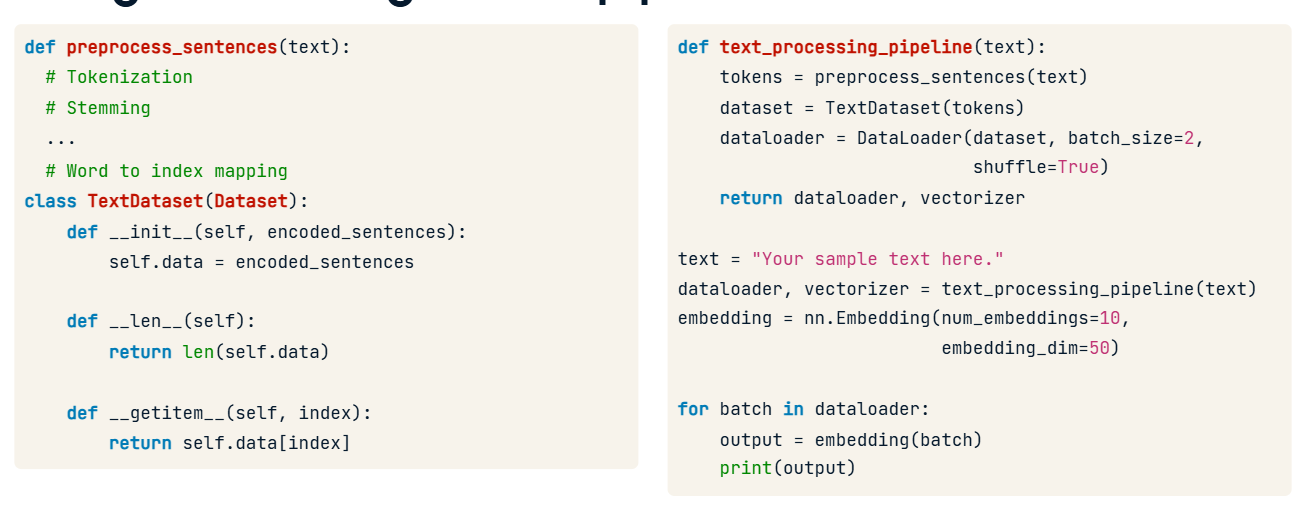

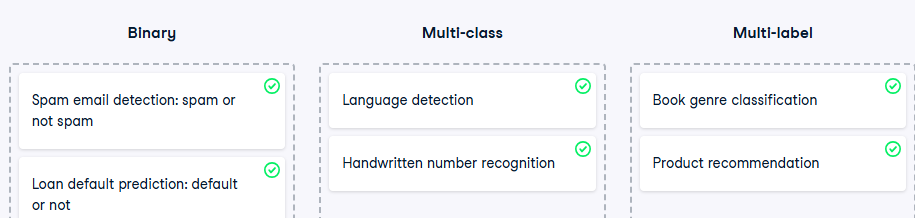

In [1]:
import torch
import torch.nn as nn

# Map a unique index to each word
words = ["This", "book", "was", "fantastic", "I", "really", "love", "science", "fiction", "but", "the", "protagonist", "was", "rude", "sometimes"]
word_to_idx = {word: i for i, word in enumerate(words)}

# Convert word_to_idx to a tensor (sequence of indices for the words)
inputs = torch.tensor([word_to_idx[w] for w in words])

# Initialize embedding layer with ten dimensions
embedding = nn.Embedding(num_embeddings=len(words), embedding_dim=10)

# Pass the tensor to the embedding layer
output = embedding(inputs)
print(output)


tensor([[ 6.9812e-01,  2.0122e+00, -2.1645e+00, -1.3072e+00,  1.5241e+00,
         -1.1996e+00,  2.4663e-01,  5.8547e-02, -2.9726e-01, -1.3653e+00],
        [-1.0386e-02, -9.4336e-01,  7.1751e-01,  3.2476e-01,  1.4209e-01,
          3.2733e-01,  1.6828e-01, -1.0895e+00, -1.0397e+00, -8.4276e-01],
        [ 1.2407e-01,  1.3065e+00, -3.4979e-01,  5.2956e-01,  1.0899e+00,
         -6.6700e-01,  6.2943e-01,  9.3141e-01, -7.4347e-01,  9.4925e-01],
        [ 5.9913e-01, -9.6407e-01,  4.4340e-01,  3.9227e-01, -1.8497e+00,
         -4.6597e-01,  4.5777e-02, -6.7483e-01, -7.7341e-01,  1.1949e+00],
        [-8.2690e-01,  1.2166e+00,  1.1156e+00,  5.5654e-01, -6.5116e-02,
          5.5926e-01,  8.7325e-01, -4.3491e-01,  9.7542e-01,  3.9521e-01],
        [ 5.2313e-01, -1.4894e+00, -9.0571e-01, -4.5474e-01, -3.1234e-01,
         -1.3691e-01, -1.7865e+00,  1.2754e+00, -1.7493e-01, -2.7766e-01],
        [-2.0804e-02, -5.1950e-01,  9.5713e-01, -7.4564e-01, -3.6788e-01,
          1.1431e+00, -1.0689e+0

In [3]:
word_to_idx

{'This': 0,
 'book': 1,
 'was': 12,
 'fantastic': 3,
 'I': 4,
 'really': 5,
 'love': 6,
 'science': 7,
 'fiction': 8,
 'but': 9,
 'the': 10,
 'protagonist': 11,
 'rude': 13,
 'sometimes': 14}

# CNNs for Text Classification (PyTorch)

## 2. CNNs for Text Classification
- CNNs are widely used for **image classification**, but they can also be applied to **text data**.
- Example: Classifying tweets as **positive, negative, or neutral**.

---

## 3. The Convolution Operation
- **Convolution**: a filter (kernel) slides over the input, performing element-wise calculations.
- Helps the model learn **word and sentence structure** and extract meaningful features.
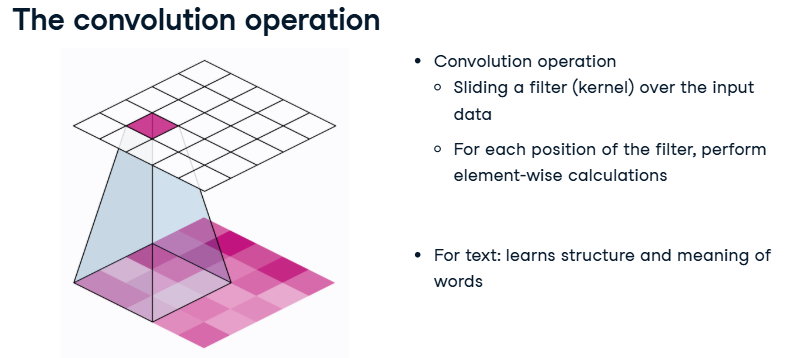


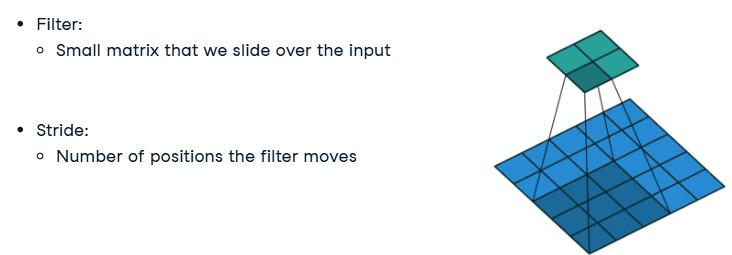

---

## 4. Filter and Stride in CNNs
- **Filter**: small matrix applied to input data (tensor).
- **Stride**: determines how many positions the filter moves each time.
- Example: a 2×2 filter with stride = 2.

---

## 5. CNN Architecture for Text
Typical architecture:
1. **Convolutional Layer** -> applies filters to detect patterns
2. **Pooling Layer** -> reduces size while preserving important information
3. **Fully Connected Layer** -> uses extracted features for final predictions

---

## 6. Implementing a Text Classification Model (CNN)
```
import torch
import torch.nn as nn
import torch.nn.functional as F

class SentimentAnalysisCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes=2):
        super(SentimentAnalysisCNN, self).__init__()
        
        # Embedding layer: converts word indexes to dense vectors
        self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embed_dim)
        
        # Convolutional layer: Conv1d for text (1D sequences)
        self.conv = nn.Conv1d(in_channels=embed_dim, out_channels=embed_dim,
                              kernel_size=3, stride=1, padding=1)
        
        # Fully connected layer: maps features to output classes
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        # Step 1: Embedding
        x = self.embedding(x)  # shape: [batch_size, seq_len, embed_dim]
        
        # Step 2: Permute dimensions for Conv1d
        x = x.permute(0, 2, 1)  # shape: [batch_size, embed_dim, seq_len]
        
        # Step 3: Convolution + ReLU
        x = F.relu(self.conv(x))
        
        # Step 4: Average pooling across sequence length
        x = x.mean(dim=2)  # shape: [batch_size, embed_dim]
        
        # Step 5: Fully connected layer
        x = self.fc(x)
        return x
```
## 7. Forward Pass Explained
- Input text -> embedding layer -> dense vectors

- Permute dimensions -> match Conv1d input format

 - Apply convolution + ReLU -> extract features

- Average across sequence length -> reduce dimensionality

- Fully connected layer -> final predictions

8. Preparing Data
- Create vocabulary and word-to-index mapping

- Use embeddings instead of One-Hot or TF-IDF (more efficient, captures relationships)

Example setup:

```
vocab_size = len(word_to_idx)

embed_dim = 10
```

- Two book review samples for demonstration

 - Loss function: CrossEntropyLoss

- Optimizer: SGD with learning rate = 0.1

9. Training the Model
```
# Example data
word_to_idx = {"this":0, "book":1, "is":2, "great":3, "bad":4}
samples = [
    (["this", "book", "is", "great"], 1),  # positive
    (["this", "book", "is", "bad"], 0)     # negative
]

# Initialize model
vocab_size = len(word_to_idx)
embed_dim = 10
model = SentimentAnalysisCNN(vocab_size, embed_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(10):
    for sentence, label in samples:
        # Convert words to indexes
        idxs = [word_to_idx[w] for w in sentence]
        inputs = torch.LongTensor(idxs).unsqueeze(0)  # batch of 1
        targets = torch.LongTensor([label])
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
```

# 10. Running Predictions
```
book_samples = [
    ["this", "book", "is", "great"],
    ["this", "book", "is", "bad"]
]

for sentence in book_samples:
    idxs = [word_to_idx[w] for w in sentence]
    inputs = torch.LongTensor(idxs).unsqueeze(0)
    outputs = model(inputs)
    
    # Get predicted sentiment
    _, predicted = torch.max(outputs, 1)
    sentiment = "Positive" if predicted.item() == 1 else "Negative"
    print("Review:", " ".join(sentence), "| Predicted Sentiment:", sentiment)

```

Output:

"this book is great" -> Positive

"this book is bad" -> Negative

# text with deep learning  win pytorch

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the CNN model
class TextClassificationCNN(nn.Module): 
    def __init__(self, vocab_size, embed_dim):
        super(TextClassificationCNN, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # Convolution layer
        self.conv = nn.Conv1d(in_channels=embed_dim,
                              out_channels=embed_dim,
                              kernel_size=3,
                              stride=1,
                              padding=1)
        # Fully connected layer (2 classes: Positive/Negative)
        self.fc = nn.Linear(embed_dim, 2)

    def forward(self, text):
        # text shape: (batch_size, seq_len)
        embedded = self.embedding(text)  # (batch_size, seq_len, embed_dim)
        embedded = embedded.permute(0, 2, 1) # (batch_size, embed_dim, seq_len)
        conved = F.relu(self.conv(embedded))  # (batch_size, embed_dim, seq_len)
        conved = conved.mean(dim=2)  # (batch_size, embed_dim)
        return self.fc(conved)   # (batch_size, num_classes)




In [28]:

# Build vocabulary

sentences = [
    ("I love this book".split(), 1),        # Positive
    ("I do not like this book".split(), 0)  # Negative
]

# Create word-to-index mapping
all_words = set(w for s,_ in sentences for w in s)
word_to_ix = {word: i for i, word in enumerate(all_words)}



In [29]:

# Initialize model, loss, optimizer

vocab_size = len(word_to_ix)
embed_dim = 10
model = TextClassificationCNN(vocab_size, embed_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)



In [30]:

# Training loop

for epoch in range(10):
    for sentence, label in sentences:
        # Clear gradients
        model.zero_grad()
        # Convert words to indices
        sentence_tensor = torch.LongTensor([word_to_ix.get(w, 0) for w in sentence]).unsqueeze(0)
        label_tensor = torch.LongTensor([label])
        # Forward pass
        outputs = model(sentence_tensor)
        # Compute loss
        loss = criterion(outputs, label_tensor)
        # Backpropagation
        loss.backward()
        optimizer.step()

print("Training complete!\n")



Training complete!



In [31]:

# Inference on new reviews

book_reviews = [
    "I don't not like this book".split(),
    "I do not like this book".split(),
    "I hate this book literally".split(),
    "This book is a state of and art".split(),
    "i like it noice".split()
]

for review in book_reviews:
    input_tensor = torch.LongTensor([word_to_ix.get(w, 0) for w in review]).unsqueeze(0)
    outputs = model(input_tensor)
    _, predicted_label = torch.max(outputs.data, 1)
    sentiment = "Positive" if predicted_label.item() == 1 else "Negative"
    print(f"Book Review: {' '.join(review)}")
    print(f"Sentiment: {sentiment}\n")

Book Review: I don't not like this book
Sentiment: Negative

Book Review: I do not like this book
Sentiment: Negative

Book Review: I hate this book literally
Sentiment: Positive

Book Review: This book is a state of and art
Sentiment: Negative

Book Review: i like it noice
Sentiment: Negative

